In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import csv

In [2]:
# import data for training and testing from csv file 
Samsung_data = pd.read_csv('Samsung_data.csv', error_bad_lines=False)
Samsung_data.columns = ['created_at', 'user_location', 'followers_count', 'friends_count', 'text', 'bounding_box_coordinates', 'full_name', 'country', 'country_code', 'place_type']

Samsung_data

,created_at,user_location,followers_count,friends_count,text,bounding_box_coordinates,full_name,country,country_code,place_type
0,2019-04-19 10:17:25,"Bloemfontein, South Africa",583,1429,@Sk8er_F @PearlThusi @HuaweiZA But bro... you ...,"[[[26.0019056, -29.2319585], [26.4243136, -29....","Bloemfontein, South Africa",South Africa,ZA,city
1,2019-04-19 10:06:34,"Bloemfontein, South Africa",583,1429,@Sk8er_F @PearlThusi @HuaweiZA The “only the c...,"[[[26.0019056, -29.2319585], [26.4243136, -29....","Bloemfontein, South Africa",South Africa,ZA,city
2,2019-04-19 09:55:39,"California, USA",1099,4375,Top 10 #Printer #Brands? Let's Share your Opin...,"[[[-124.482003, 32.528832], [-114.131212, 32.5...","California, USA",United States,US,admin
3,2019-04-19 09:52:54,"London, England",431,674,@BenObi2000 @SnazzyQ @Vortex__Zero @iFixit @Za...,"[[[-0.245869, 51.330352], [-0.117306, 51.33035...","Sutton, London",United Kingdom,GB,city
4,2019-04-19 09:48:11,University of the Philippines,670,578,"After 10 years, support for Windows 7 will cea...","[[[120.989705, 14.5893763], [121.1357656, 14.5...","Quezon City, National Capital Region",Republic of the Philippines,PH,city
5,2019-04-19 09:27:21,"Kolkata, India",149,684,Kuchh toh #LOG kahenge || Don't forget to watc...,"[[[73.8031065, 18.4571648], [73.9656571, 18.45...","Pune, India",India,IN,city
6,2019-04-19 09:09:02,"New Delhi, India",561,2408,@Samsung Android Pie Update\r\n\r\n☆ APRIL 201...,"[[[76.84252, 28.397657], [77.347652, 28.397657...","New Delhi, India",India,IN,city
7,2019-04-19 09:04:36,"Barnsley, South Yorkshire",1705,1010,#Easter #Sale\r\n1 - #XboxOne #Minecraft pad &...,"[[[-1.535204, 53.525812], [-1.410359, 53.52581...","Barnsley, England",United Kingdom,GB,city
8,2019-04-19 08:49:13,"Bonn, Deutschland",51,59,Samsung is so trash omg https://t.co/pjtdHV9Tkj,"[[[7.022472, 50.632531], [7.2107005, 50.632531...","Bonn, Germany",Germany,DE,city
9,2019-04-19 08:38:12,Lilongwe District,782,241,@snapdragon_88 Probably initial ones; the full...,"[[[32.6718934, -17.1276504], [35.92038, -17.12...",Malawi,Malawi,MW,country


In [3]:
# helper function to clean tweets
import re 
from string import punctuation

def processTweet(tweet):
    # remove HTML special entities (e.g. &amp;)
    tweet = re.sub(r'\&\w*;','', tweet)
    # convert @username to AT_USER
    tweet = re.sub('@[^\s]+','',tweet)
    # remove tickers
    tweet = re.sub(r'\$\w','',tweet)
    # convert tweet to lowercase
    tweet = tweet.lower()
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*\/\w*','',tweet)
    # remove hashtags
    tweet = re.sub(r'#\w*','',tweet)
    # remove punctuation and split 's, 't, 've with a space for filter
    tweet = re.sub(r'['+ punctuation.replace('@', '') +']+', ' ', tweet)
    # remove words with two or fewer letters
    tweet = re.sub(r'\b\w{1,2}\b','', tweet)
    # remove whitespace (including new line characters)
    tweet = re.sub(r'\s\s+', ' ', tweet)
    # remove single space remaining at the front of the tweet.
    tweet = tweet.lstrip(' ') 
    # remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    tweet = ''.join(c for c in tweet if c <= '\uFFFF') 
    return tweet

In [4]:
# clean the dataframe's text column 
Samsung_data['text'] = Samsung_data['text'].apply(processTweet) 

In [5]:
Samsung_data

,created_at,user_location,followers_count,friends_count,text,bounding_box_coordinates,full_name,country,country_code,place_type
0,2019-04-19 10:17:25,"Bloemfontein, South Africa",583,1429,but bro you have remember these brands have di...,"[[[26.0019056, -29.2319585], [26.4243136, -29....","Bloemfontein, South Africa",South Africa,ZA,city
1,2019-04-19 10:06:34,"Bloemfontein, South Africa",583,1429,the “only the camera” saying was just double e...,"[[[26.0019056, -29.2319585], [26.4243136, -29....","Bloemfontein, South Africa",South Africa,ZA,city
2,2019-04-19 09:55:39,"California, USA",1099,4375,top let share your opinion ➡️ ➡️ canon ➡️ epso...,"[[[-124.482003, 32.528832], [-114.131212, 32.5...","California, USA",United States,US,admin
3,2019-04-19 09:52:54,"London, England",431,674,just going the biggest phone repair youtuber o...,"[[[-0.245869, 51.330352], [-0.117306, 51.33035...","Sutton, London",United Kingdom,GB,city
4,2019-04-19 09:48:11,University of the Philippines,670,578,after years support for windows will cease jan...,"[[[120.989705, 14.5893763], [121.1357656, 14.5...","Quezon City, National Capital Region",Republic of the Philippines,PH,city
5,2019-04-19 09:27:21,"Kolkata, India",149,684,kuchh toh kahenge don forget watch latest psyc...,"[[[73.8031065, 18.4571648], [73.9656571, 18.45...","Pune, India",India,IN,city
6,2019-04-19 09:09:02,"New Delhi, India",561,2408,android pie update ☆ april 2019 samsung ▪ ▪ ▪ ...,"[[[76.84252, 28.397657], [77.347652, 28.397657...","New Delhi, India",India,IN,city
7,2019-04-19 09:04:36,"Barnsley, South Yorkshire",1705,1010,pad month only £ off selected …,"[[[-1.535204, 53.525812], [-1.410359, 53.52581...","Barnsley, England",United Kingdom,GB,city
8,2019-04-19 08:49:13,"Bonn, Deutschland",51,59,samsung trash omg,"[[[7.022472, 50.632531], [7.2107005, 50.632531...","Bonn, Germany",Germany,DE,city
9,2019-04-19 08:38:12,Lilongwe District,782,241,probably initial ones the full reviews haven’ ...,"[[[32.6718934, -17.1276504], [35.92038, -17.12...",Malawi,Malawi,MW,country


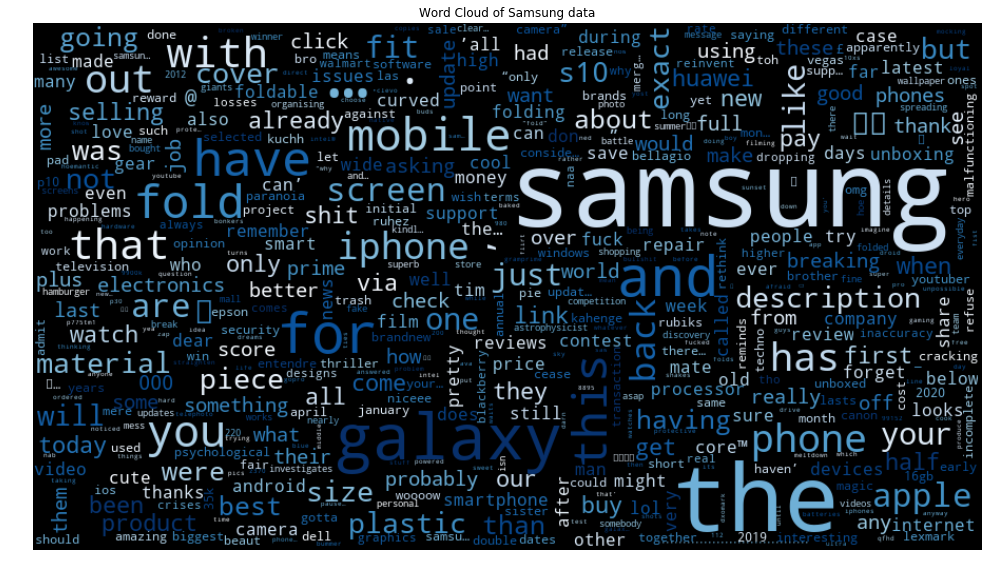

In [7]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# split sentences to get individual words
all_words = []
for line in Samsung_data['text']:
    words = line.split()
    for word in words:
        all_words.append(word.lower())
        
# create a word frequency dictionary
wordfreq = Counter(all_words)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900, height=500, max_words=500, max_font_size=100, relative_scaling=0.5, colormap='Blues', normalize_plurals=True).generate_from_frequencies(wordfreq)

plt.figure(figsize=(17,14))
plt.title('Word Cloud of Samsung data')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [8]:
from sklearn.externals import joblib

# load from file and predict whether the samsung related tweets are positive or negative
model_NB = joblib.load("twitter_sentiment.pkl" )

predictions = model_NB.predict(Samsung_data['text'])

Samsung_data['prediction'] = pd.DataFrame(predictions)
Samsung_data

c:\users\5559\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.20.3 when using version 0.19.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
c:\users\5559\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.20.3 when using version 0.19.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
c:\users\5559\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.20.3 when using version 0.19.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
c:\users\5559\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator Pipeli

,created_at,user_location,followers_count,friends_count,text,bounding_box_coordinates,full_name,country,country_code,place_type,prediction
0,2019-04-19 10:17:25,"Bloemfontein, South Africa",583,1429,but bro you have remember these brands have di...,"[[[26.0019056, -29.2319585], [26.4243136, -29....","Bloemfontein, South Africa",South Africa,ZA,city,1
1,2019-04-19 10:06:34,"Bloemfontein, South Africa",583,1429,the “only the camera” saying was just double e...,"[[[26.0019056, -29.2319585], [26.4243136, -29....","Bloemfontein, South Africa",South Africa,ZA,city,1
2,2019-04-19 09:55:39,"California, USA",1099,4375,top let share your opinion ➡️ ➡️ canon ➡️ epso...,"[[[-124.482003, 32.528832], [-114.131212, 32.5...","California, USA",United States,US,admin,1
3,2019-04-19 09:52:54,"London, England",431,674,just going the biggest phone repair youtuber o...,"[[[-0.245869, 51.330352], [-0.117306, 51.33035...","Sutton, London",United Kingdom,GB,city,0
4,2019-04-19 09:48:11,University of the Philippines,670,578,after years support for windows will cease jan...,"[[[120.989705, 14.5893763], [121.1357656, 14.5...","Quezon City, National Capital Region",Republic of the Philippines,PH,city,1
5,2019-04-19 09:27:21,"Kolkata, India",149,684,kuchh toh kahenge don forget watch latest psyc...,"[[[73.8031065, 18.4571648], [73.9656571, 18.45...","Pune, India",India,IN,city,1
6,2019-04-19 09:09:02,"New Delhi, India",561,2408,android pie update ☆ april 2019 samsung ▪ ▪ ▪ ...,"[[[76.84252, 28.397657], [77.347652, 28.397657...","New Delhi, India",India,IN,city,0
7,2019-04-19 09:04:36,"Barnsley, South Yorkshire",1705,1010,pad month only £ off selected …,"[[[-1.535204, 53.525812], [-1.410359, 53.52581...","Barnsley, England",United Kingdom,GB,city,0
8,2019-04-19 08:49:13,"Bonn, Deutschland",51,59,samsung trash omg,"[[[7.022472, 50.632531], [7.2107005, 50.632531...","Bonn, Germany",Germany,DE,city,0
9,2019-04-19 08:38:12,Lilongwe District,782,241,probably initial ones the full reviews haven’ ...,"[[[32.6718934, -17.1276504], [35.92038, -17.12...",Malawi,Malawi,MW,country,1


In [9]:
# longitute latitude
df = Samsung_data['bounding_box_coordinates']
longitude = []
latitude = []
for ele in df:
    longitude.append(ele[3:].split(',')[0])
    s = ele[3:].split(',')[1]
    s = re.sub(']','', s)
    latitude.append(s)

In [10]:
for i in range(len(longitude)):
    longitude[i] = float(longitude[i])
    latitude[i] = float(latitude[i])

In [11]:
df1 = pd.DataFrame()
df1['longitude'] = longitude
df1['latitude'] = latitude
df1['predictions'] = predictions

pos = df1[df1['predictions']==1]
neg = df1[df1['predictions']==0]
long1 = list(pos['longitude'])
long2 = list(neg['longitude'])
lat1 = list(pos['latitude'])
lat2 = list(neg['latitude'])

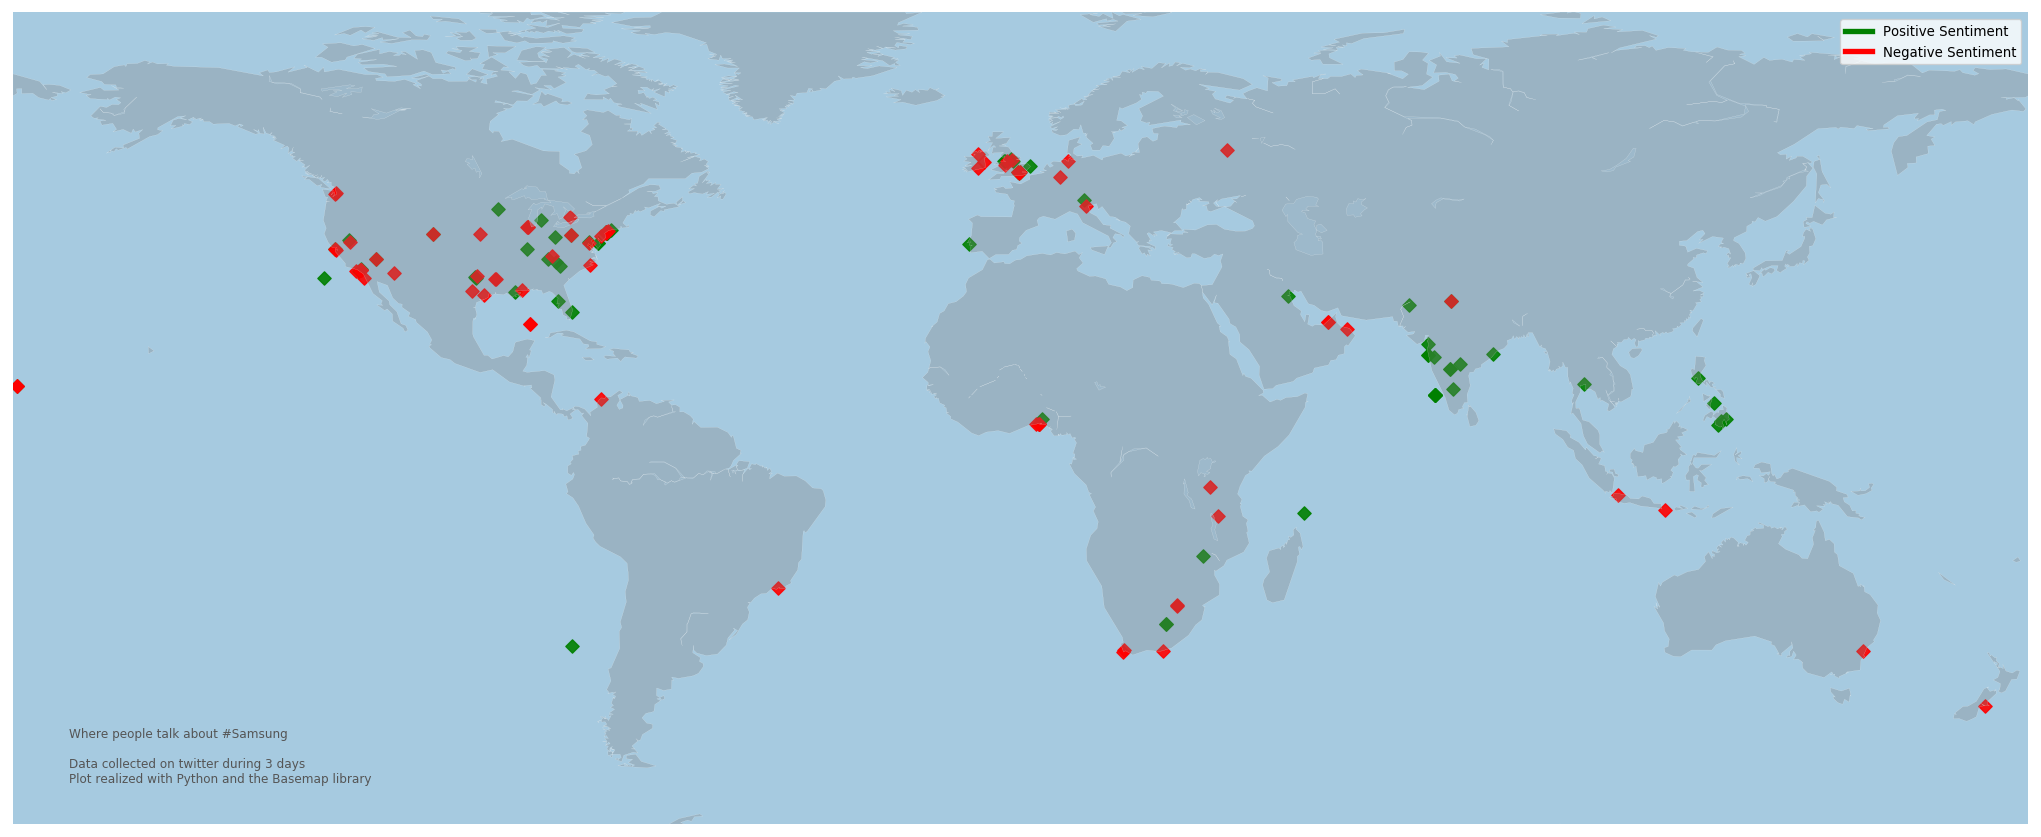

In [16]:
# Libraries
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
 
# Set the dimension of the figure
my_dpi=96
plt.figure(figsize=(2600/my_dpi, 1800/my_dpi), dpi=my_dpi)
 
# Make the background map
m = Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")

x1, y1 = m(long1, lat1)
x2, y2 = m(long2, lat2)


# Add a point per position
m.scatter(x1, y1, s=50, alpha = 0.9, marker = 'D', color="green")
m.scatter(x2, y2, s=50, alpha = 0.9, marker = 'D', color="red")

plt.text( -170, -58,'Where people talk about #Samsung\n\nData collected on twitter during 3 days\nPlot realized with Python and the Basemap library', ha='left', va='bottom', size=9, color='#555555' )

custom_lines = [Line2D([0], [0], color='green', lw=4), Line2D([0], [0], color='red', lw=4)]
plt.legend(custom_lines, ['Positive Sentiment', 'Negative Sentiment'], loc='upper right') 

plt.show()